In [228]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import matplotlib.cm as cm


def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data1 = unpickle('cifar-10-batches-py/data_batch_1')
data2 = unpickle('cifar-10-batches-py/data_batch_2')
data3 = unpickle('cifar-10-batches-py/data_batch_3')
data4 = unpickle('cifar-10-batches-py/data_batch_4')
data5 = unpickle('cifar-10-batches-py/data_batch_5')
data = np.vstack((data1[b'data'],data2[b'data'],data3[b'data'],data4[b'data'],data5[b'data']))
labels = np.vstack((data1[b'labels'],data2[b'labels'],data3[b'labels'],data4[b'labels'],data5[b'labels']))
labels = labels.flatten()


# conversion to greyscale
data = data/255;
data = 0.299 * data[:,:1024] + 0.587 * data[:,1024:2048] + 0.114 * data[:,2048:3072]
print(data.shape)

(50000, 1024)


In [229]:
indices = np.argsort(labels)
data = data[indices]
labels = labels[indices]

means=[]
for i in range(0,50000,5000):
    means.append(np.mean(data[i:i+5000],axis=0))
print(np.matrix(means).shape)
print(means)

(10, 1024)
[array([0.62085954, 0.61684399, 0.6192767 , ..., 0.52651307, 0.52529052,
       0.52687895]), array([0.53933682, 0.53783013, 0.54201906, ..., 0.50958463, 0.51239605,
       0.51606008]), array([0.49952858, 0.50023614, 0.50445775, ..., 0.48684128, 0.48560581,
       0.48437393]), array([0.45855013, 0.45793956, 0.46062571, ..., 0.47870329, 0.47432901,
       0.47137291]), array([0.42820498, 0.42918107, 0.4340095 , ..., 0.49117166, 0.48903283,
       0.48587047]), array([0.4135456 , 0.4107127 , 0.41359975, ..., 0.46252762, 0.45824196,
       0.45602271]), array([0.43854637, 0.43462743, 0.43607584, ..., 0.4784857 , 0.47688345,
       0.47700236]), array([0.54534176, 0.53988823, 0.54223609, ..., 0.51764185, 0.51941863,
       0.52361101]), array([0.626294  , 0.62299879, 0.62683224, ..., 0.41143353, 0.4139348 ,
       0.41836759]), array([0.68699217, 0.68299502, 0.68654821, ..., 0.52602293, 0.52979477,
       0.53372403])]


In [230]:
class_vectors = []
for i in range(0,50000,5000):
    values,vectors = np.linalg.eig(np.cov(data[i:i+5000].T))

    indices = np.argsort(values)
    indices = np.flip(indices)
    vectors = vectors[indices]
    values = values[indices]
    class_vectors.append(vectors[:,:20])
print(np.shape(class_vectors))
print(class_vectors)

(10, 1024, 20)
[array([[-0.03754891, -0.03683068,  0.02609154, ..., -0.03109121,
        -0.01378958,  0.01906871],
       [-0.03724031, -0.03706461,  0.02547951, ..., -0.03322948,
        -0.01394121,  0.01857716],
       [-0.03723993, -0.03776547,  0.02513645, ..., -0.03392415,
        -0.01086325,  0.01792162],
       ...,
       [-0.01168246,  0.02093437, -0.05495205, ...,  0.01026373,
        -0.04168171,  0.03150537],
       [-0.01692191,  0.02119051, -0.04937251, ...,  0.00021214,
        -0.0227718 , -0.05952619],
       [-0.02373091,  0.02139079, -0.03548878, ...,  0.04193561,
         0.03897285, -0.04000357]]), array([[-0.05328069,  0.02102392,  0.01787531, ...,  0.0030374 ,
        -0.04351193,  0.03531076],
       [-0.05313789,  0.0205935 ,  0.01796487, ...,  0.00463254,
        -0.04817307,  0.03051037],
       [-0.05342277,  0.02100982,  0.01818916, ...,  0.00897672,
        -0.05059172,  0.02466706],
       ...,
       [-0.00862241, -0.01432586, -0.04058002, ...,  0.008

In [231]:
red_data = (np.matmul(data[0:5000],class_vectors[0]))
print(np.shape(red_data))
for i in range(1,10):
    red_data = np.vstack((red_data,np.dot(data[i*5000:(i+1)*5000],class_vectors[i])))
print(np.shape(red_data))

(5000, 20)
(50000, 20)


(5000, 1024)
(50000, 1024)
(50000,)
[4.124161469911906, 5.342568481254835, 4.249499404816228, 5.249676675591694, 3.835160884476344, 5.1530223037007765, 4.374681556955402, 5.045466193732248, 4.220744286830854, 5.407011952812087]


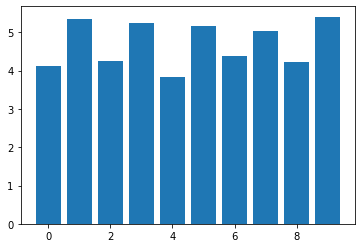

In [232]:
rec_data = (np.dot(red_data[0:5000],class_vectors[0].T))
print(np.shape(rec_data))
for i in range(1,10):
    rec_data = np.vstack((rec_data,np.dot(red_data[i*5000:(i+1)*5000],class_vectors[i].T)))
print(np.shape(rec_data))


er_data = np.sqrt(np.sum(np.square(rec_data-data),axis=1))
print(er_data.shape)
errors = []
for i in range(10):
    errors.append(np.sum(er_data[i*5000:(i+1)*5000])/5000)
plt.bar([i for i in range(len(errors))],errors)
print(errors)

In [233]:
red_means=[np.mean(red_data[0:5000],axis=0)]
for i in range(5000,50000,5000):
    red_means.append(np.mean(red_data[i:i+5000],axis=0))
print(np.matrix(red_means).shape)

split_red_data = np.split(red_data,10)
print(np.matrix(split_red_data[0]).shape)

for i in range(10):
     print(np.sum(np.square(split_red_data[i]-red_means[i])))

(10, 20)
(5000, 20)
184639.3560574156
183609.74758501418
140940.73147393196
167309.2058831121
128090.07209130656
150490.48513044542
134186.57560645204
152723.97174580567
159721.45894989034
153839.26267943752


In [239]:
for i in range(10):
    for j in range(10):
        print(np.sqrt(np.sum(np.square(means[i]-means[j]))),end=" ")
    
    

0.0 3.3434849420482937 2.4822256977175683 3.394033042032367 3.5699442099552408 3.5455528515874604 4.1112483327458875 2.6867430317107317 2.104663332838306 2.94239323739722 3.3434849420482937 0.0 1.9601281737750609 2.18856190506332 2.2844160576231696 2.670213725656056 1.9911300863378452 2.103530728479293 2.5254166961193527 2.0073769427835595 2.4822256977175683 1.9601281737750609 0.0 1.1624011338094764 1.209133077881331 1.5920186419475102 1.8084372759849026 0.7940661309016523 2.688829892870146 2.9818777135557157 3.394033042032367 2.18856190506332 1.1624011338094764 0.0 0.6439597372763227 0.8923777613470364 1.0348499088123784 1.2241366648168082 3.418714479981168 3.5879824721287483 3.5699442099552408 2.2844160576231696 1.209133077881331 0.6439597372763227 0.0 1.1132496933983784 0.9822539236704391 1.2849640545075485 3.6851900527127452 3.7774248047839927 3.5455528515874604 2.670213725656056 1.5920186419475102 0.8923777613470364 1.1132496933983784 0.0 1.4611213157701142 1.8189411567240517 3.53

In [235]:
errors = np.empty([10,10])
for i in range(10):
    for j in range(10):
        Eab = np.sum(np.square((means[i]+rec_data[j*5000:(j+1)*5000])-data[i*5000:(i+1)*5000]),axis=1)/1024 
        Eba = np.sum(np.square((means[j]+rec_data[i*5000:(i+1)*5000])-data[j*5000:(j+1)*5000]),axis=1)/1024
        errors[i][j]=(np.sum(Eab)+np.sum(Eba)/2)
print(errors)

[[2447.2077558  2532.99386581 2556.50384434 2523.88371636 2398.94232912
  2525.55460291 2332.94720994 2566.53699766 2796.80773879 2665.68611217]
 [2795.12385145 1804.64461849 2359.96755094 2338.08790014 2214.00623918
  2332.23675122 2141.10858254 2378.98225997 2593.24019608 2481.47639902]
 [2745.70492188 2287.13026779 1897.53122502 2285.13162636 2165.6294375
  2278.60274897 2092.31981114 2327.74771412 2551.4517425  2414.50750658]
 [2783.81170529 2335.70512546 2355.6453648  1828.40049506 2200.5383075
  2321.84002501 2127.86124314 2367.40179364 2586.08010424 2468.52149916]
 [2639.76979571 2192.59831836 2217.2857209  2181.67417158 1687.43618739
  2188.10010844 1986.4185147  2231.93139994 2443.14571689 2325.21171492]
 [2766.07930289 2310.74192777 2329.89006683 2302.55042475 2187.56547415
  1863.27083056 2113.19675264 2350.07386613 2564.60024207 2449.36661082]
 [2629.14259444 2175.37443008 2199.328776   2164.50347177 2041.8236435
  2169.04344975 1582.41915582 2216.22383247 2427.67263928 230

In [237]:
for i in range(10):
    indices = np.argsort(errors[i])
    print(indices[0:3])

[6 4 0]
[1 6 4]
[2 6 4]
[3 6 4]
[4 6 3]
[5 6 4]
[6 4 3]
[7 6 4]
[8 6 4]
[9 6 4]
